# Assignment 14. Decision Tree - 02

### Dataset: Fraud_check.csv

### import Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

#### Loading Dataset

In [3]:
Fraud_data = pd.read_csv('Fraud_check.csv')
Fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### EDA & Data Preprocessing

In [4]:
Fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
Fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
# Renaming columns
Fraud_data1 = Fraud_data.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
Fraud_data1.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
Fraud_data1.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


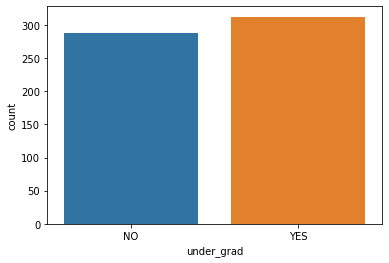

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


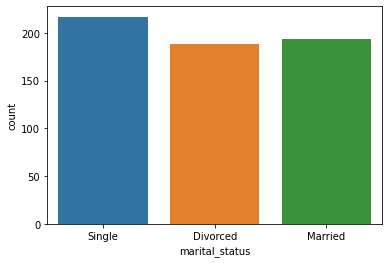

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


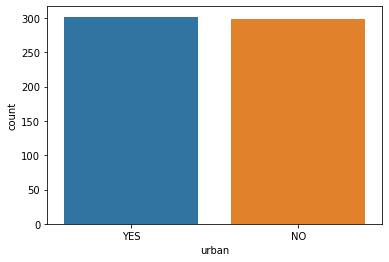

In [13]:
# checking count of categories for categorical columns colums


sns.countplot(Fraud_data1['under_grad'])
plt.show()

sns.countplot(Fraud_data1['marital_status'])
plt.show()

sns.countplot(Fraud_data1['urban'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


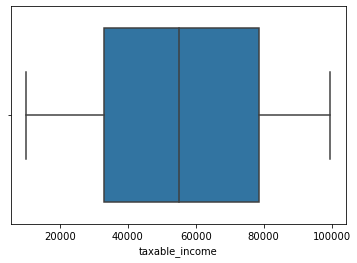

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


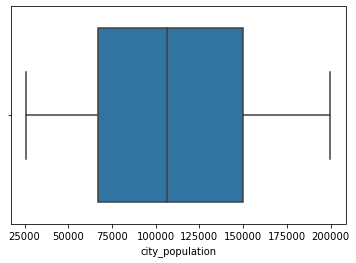

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


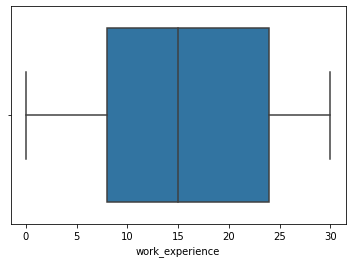

In [14]:
# Checking for outliers in numerical data
sns.boxplot(Fraud_data1['taxable_income'])
plt.show()

sns.boxplot(Fraud_data1['city_population'])
plt.show()

sns.boxplot(Fraud_data1['work_experience'])
plt.show()

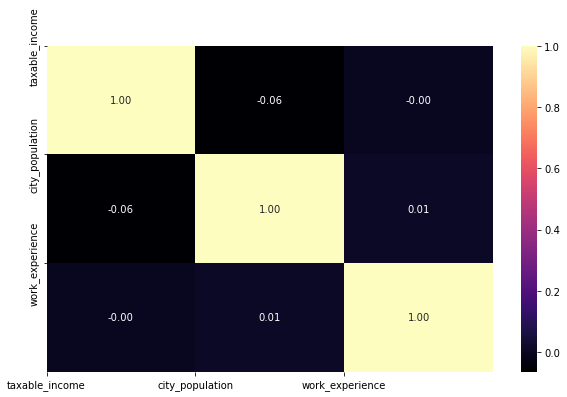

In [15]:
# Correlation analysis for data
corr = Fraud_data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [16]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
Fraud_data1['taxable_category'] = pd.cut(x = Fraud_data1['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
Fraud_data1

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxable_category', ylabel='count'>

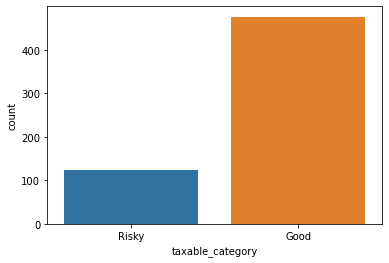

In [17]:
sns.countplot(Fraud_data1['taxable_category'])

In [18]:
Fraud_data1['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [26]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

Fraud_data1['under_grad'] = label_encoder.fit_transform(Fraud_data1['under_grad'])
Fraud_data1['marital_status'] = label_encoder.fit_transform(Fraud_data1['marital_status'])
Fraud_data1['urban'] = label_encoder.fit_transform(Fraud_data1['urban'])
Fraud_data1['taxable_category'] = label_encoder.fit_transform(Fraud_data1['taxable_category'])
Fraud_data1.sample(10)

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
285,0,2,77511,63420,10,0,0
542,1,1,34655,199778,27,0,0
584,0,0,42679,155684,4,1,0
80,0,1,44947,28184,26,0,0
43,1,0,70339,50020,10,0,0
481,1,2,62998,120012,13,0,0
248,0,2,28904,105374,17,1,1
14,0,1,64070,57529,13,1,0
277,0,0,63710,117364,11,0,0
473,1,2,58496,147367,16,1,0


In [27]:
# dropping column taxable_income
Fraud_data2 = Fraud_data1.drop('taxable_income', axis = 1)
Fraud_data2

,under_grad,marital_status,city_population,work_experience,urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


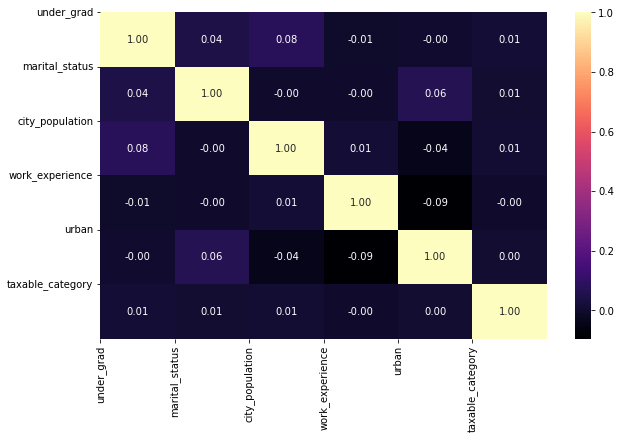

In [28]:
# Correlation analysis for data11
corr = Fraud_data2.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [29]:
# Dividing data into independent variables and dependent variable
X = Fraud_data2.drop('taxable_category', axis = 1)
y = Fraud_data2['taxable_category']

In [30]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

### Building model based on C5.0 Algorithm

In [31]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

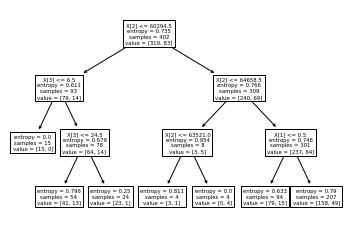

In [32]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [33]:
Fraud_data2.columns

Index(['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category'],
      dtype='object')

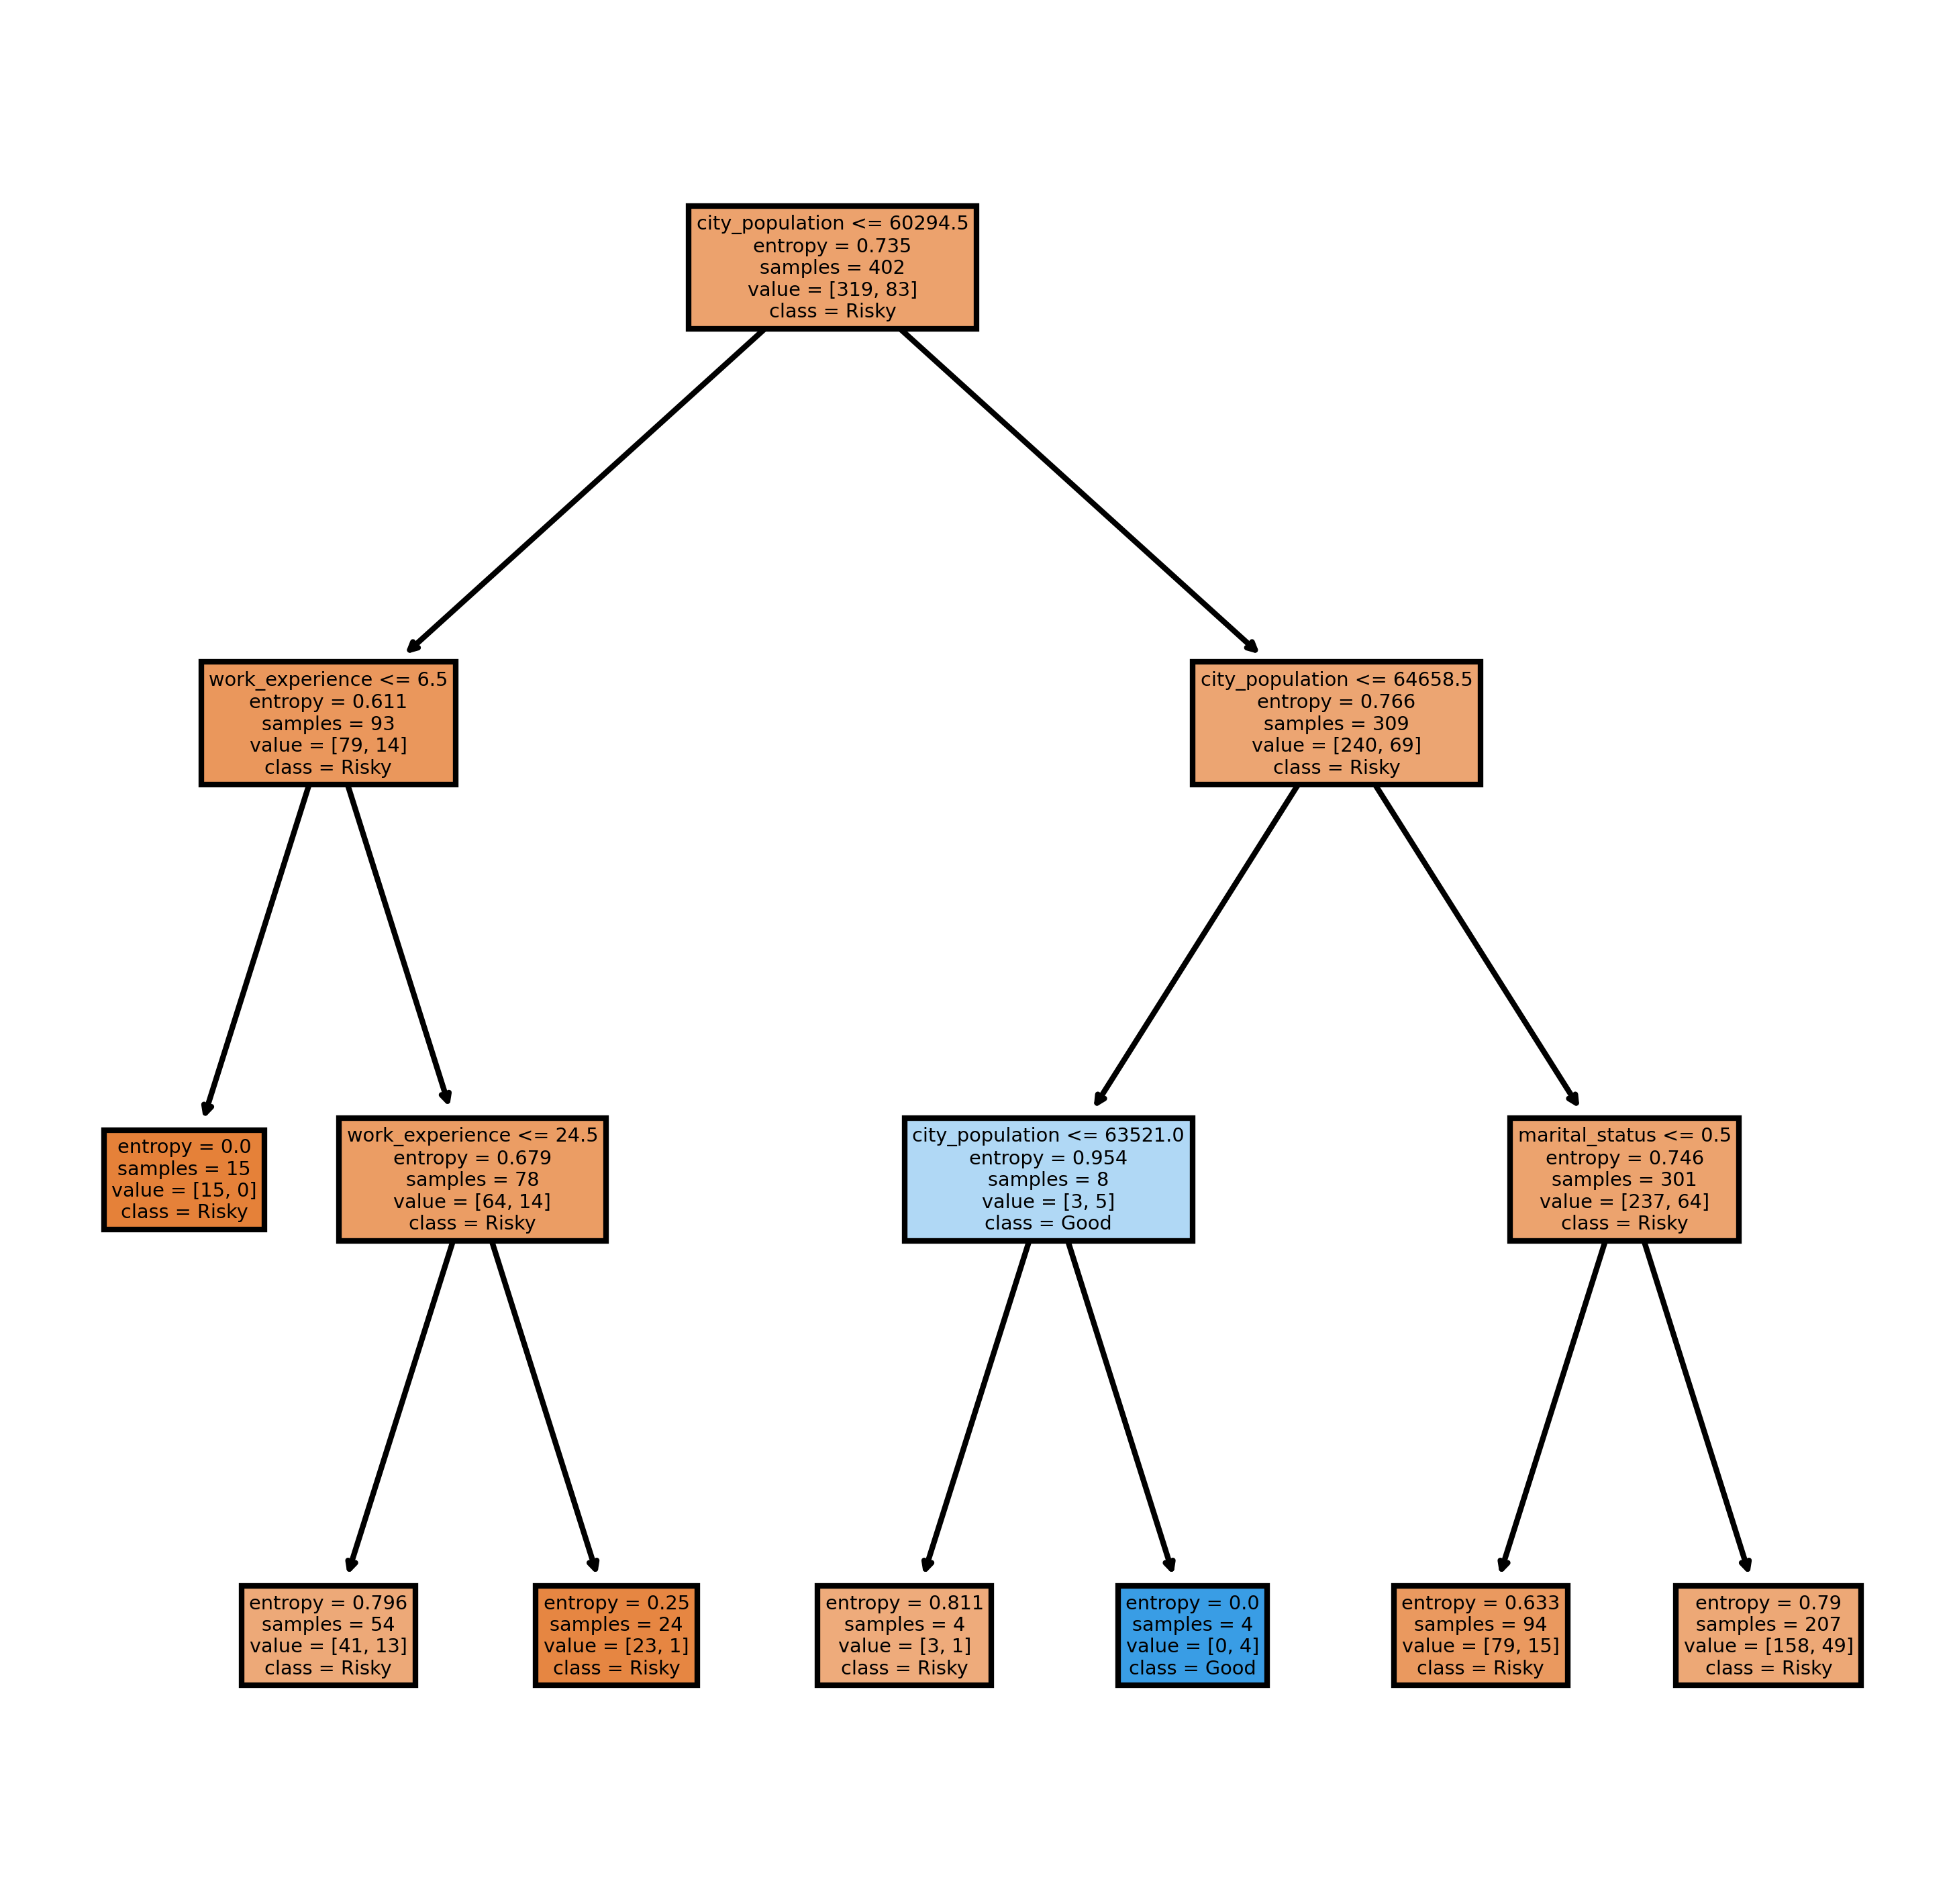

In [34]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
# Predicting Data
Fraud_data_preds = model_c5.predict(x_test)
pd.Series(Fraud_data_preds).value_counts()

0    197
1      1
dtype: int64

In [37]:
Fraud_data_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
# Creating cross tables for checking model
pd.crosstab(y_test, Fraud_data_preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [39]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.7878787878787878

### Building model based on CART Algorithm

In [40]:
Fraud_data_model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
Fraud_data_model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

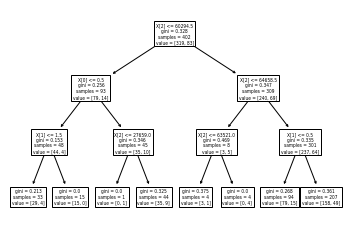

In [41]:
# Plotting Decision tree
tree.plot_tree(Fraud_data_model_CART);

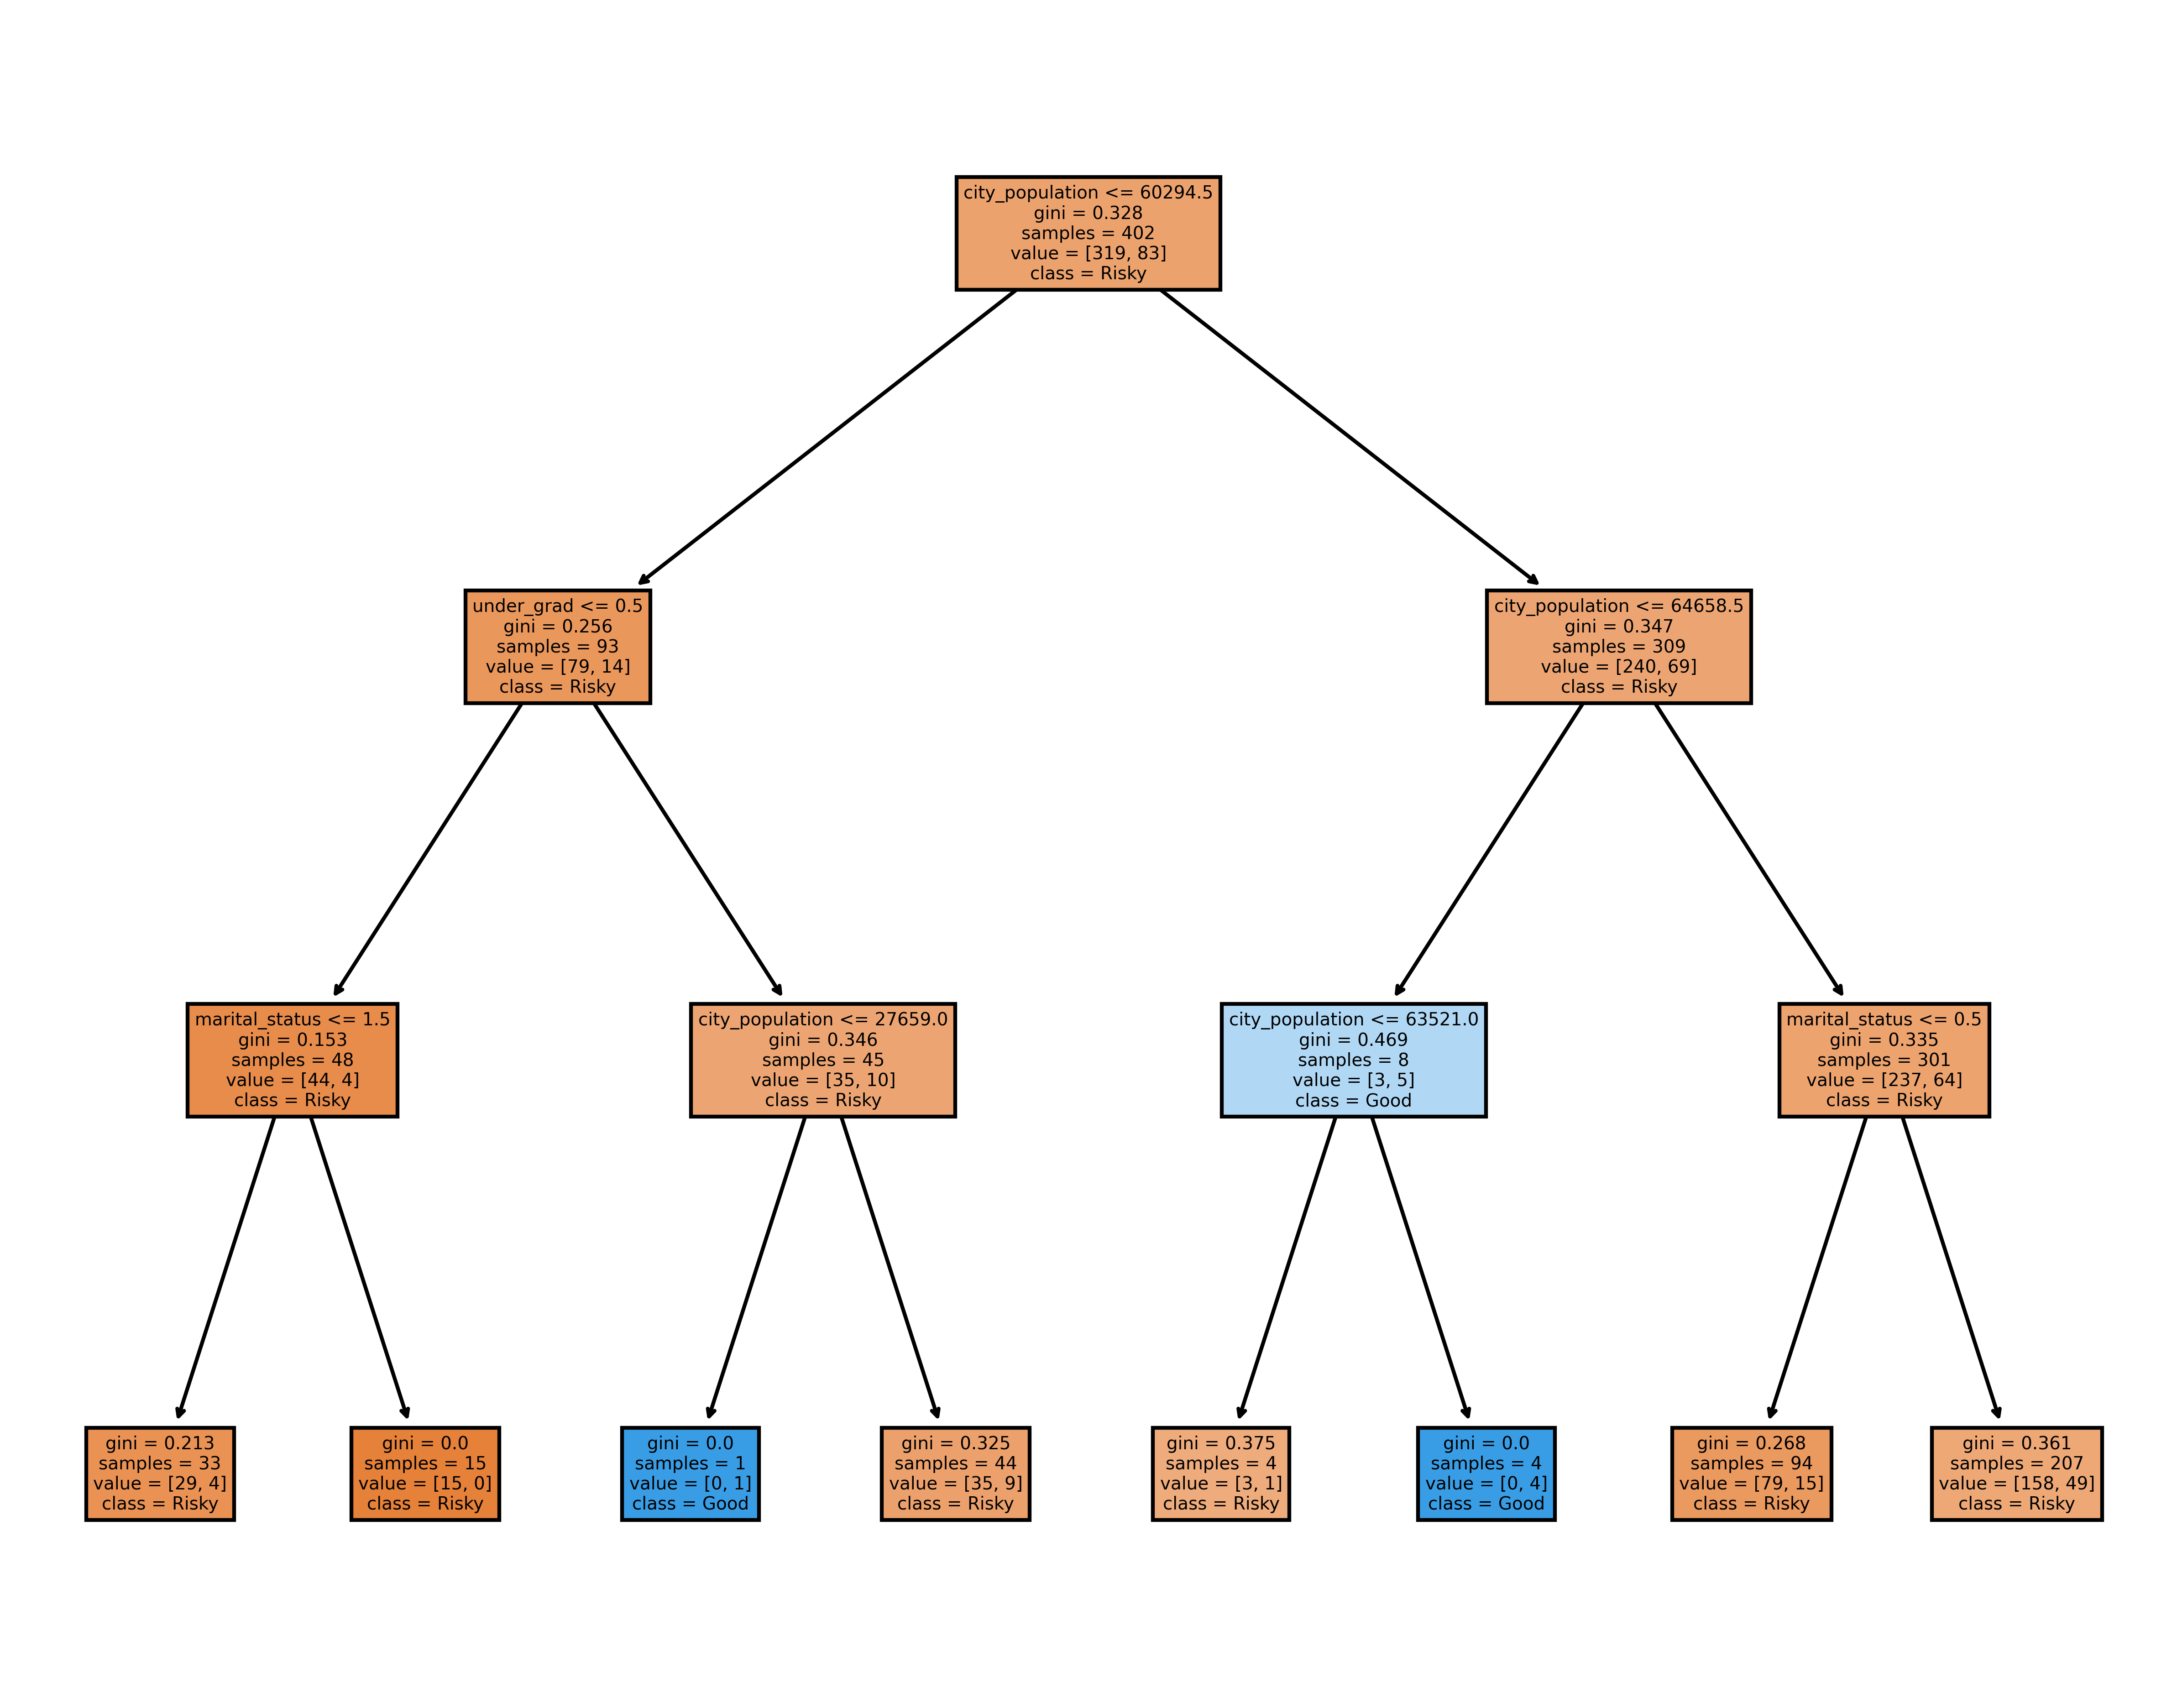

In [43]:
fn1=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn1=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=600)
tree.plot_tree(Fraud_data_model_CART,
               feature_names = fn1, 
               class_names=cn1,
               filled = True);

In [45]:
# Predicting Data
Fraud_data_preds1 = Fraud_data_model_CART.predict(x_test)
pd.Series(Fraud_data_preds1).value_counts()

0    197
1      1
dtype: int64

In [46]:
Fraud_data_preds1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [48]:
# Checking accuracy of model
Fraud_data_model_CART.score(x_test, y_test)

0.7878787878787878

### ==========================================================================================